Abhishek Singh  
Mat Nr: 229773

Part 1: Revisiting Autoencoders

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [ ]:
print(tf.__version__)

2.4.1


In [ ]:
# fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, _), (x_test, _) = fashion_mnist.load_data()
# (x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
latent_dim = 64

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      # layers.Dense(1024, activation='sigmoid'),
      layers.Reshape((28, 28))                    #original shape
      # layers.Reshape((32, 32))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0397 - val_loss: 0.0135
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0124 - val_loss: 0.0108
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0103 - val_loss: 0.0099
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0097 - val_loss: 0.0095
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0091 - val_loss: 0.0093
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0089 - val_loss: 0.0091
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.008

2.4.1


In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

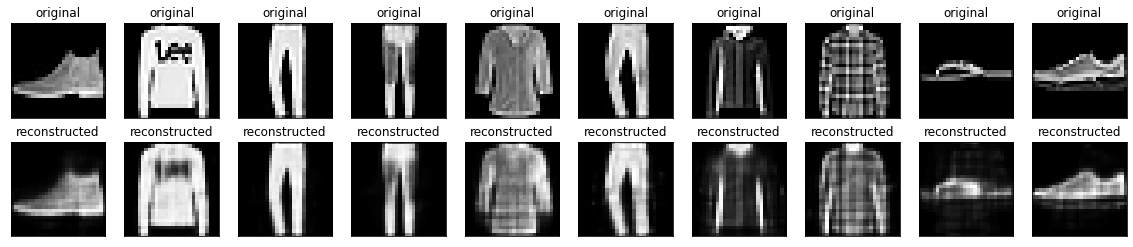

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

CNN encoder/decoder

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [ ]:
(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)
print(len(x_train))

(60000, 28, 28)
(10000, 28, 28)
60000


 encoder network, uses 3 convolutional layers with max pooling

In [ ]:
conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2)
  ])
conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="valid",
    activation="relu",
    input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="same",
    activation="relu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="same",
    activation="sigmoid"),
    keras.layers.Reshape([28, 28])  #Original Shape
  ])
conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

In [ ]:
conv_ae.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
conv_ae.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 3, 3, 64)          23296     
_________________________________________________________________
sequential_5 (Sequential)    (None, 28, 28)            23233     
Total params: 46,529
Trainable params: 46,529
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conv_ae.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=256,
    shuffle=False,
    validation_data=(x_test, x_test)
)

Epoch 1/50
235/235 [==============================] - 48s 204ms/step - loss: 0.1004 - val_loss: 0.0209
Epoch 2/50
235/235 [==============================] - 48s 204ms/step - loss: 0.0191 - val_loss: 0.0159
Epoch 3/50
235/235 [==============================] - 48s 205ms/step - loss: 0.0152 - val_loss: 0.0137
Epoch 4/50
235/235 [==============================] - 48s 205ms/step - loss: 0.0133 - val_loss: 0.0124
Epoch 5/50
235/235 [==============================] - 48s 205ms/step - loss: 0.0122 - val_loss: 0.0116
Epoch 6/50
235/235 [==============================] - 48s 204ms/step - loss: 0.0115 - val_loss: 0.0110
Epoch 7/50
235/235 [==============================] - 48s 204ms/step - loss: 0.0109 - val_loss: 0.0105
Epoch 8/50
235/235 [==============================] - 50s 212ms/step - loss: 0.0104 - val_loss: 0.0102
Epoch 9/50
235/235 [==============================] - 48s 204ms/step - loss: 0.0100 - val_loss: 0.0099
Epoch 10/50
235/235 [==============================] - 48s 205ms/step - l

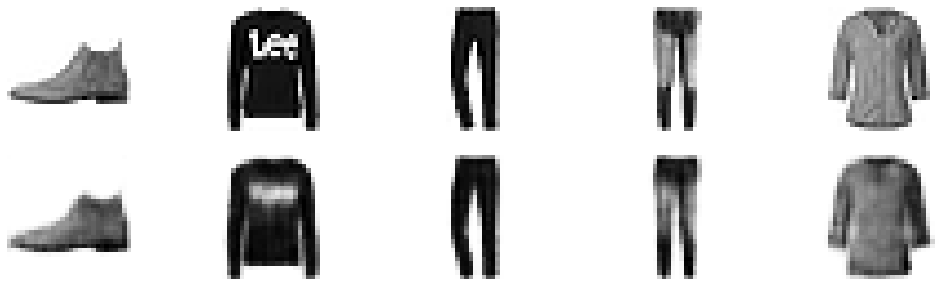

In [ ]:
def plot_image(image):
  plt.imshow(image, cmap="binary")
  plt.axis("off")

def decoded_imgs(model, n_images=5):
  reconstructions = model.predict(x_test[:n_images])
  fig = plt.figure(figsize=(n_images * 3.5, 5))
  for image_index in range(n_images):
    plt.subplot(2, n_images, 1 + image_index)
    plot_image(x_test[image_index])
    plt.subplot(2, n_images, 1 + n_images + image_index)
    plot_image(reconstructions[image_index])

decoded_imgs(conv_ae)